In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Assesing overlap of the data (Mike's graphs)

In [45]:
infile = 'jma_nitrate.csv'
data = pd.read_csv(infile, sep = (','))

#Let's take a look at the data.
data

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277
5,5,20.0183,34.7358,100,4.23,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,24.437166
6,6,16.5906,34.6531,126,8.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,25.225035
7,7,14.6750,34.5628,151,12.31,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,25.585692
8,8,13.4401,34.4981,201,15.10,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,25.794768
9,9,10.4524,34.3719,251,21.73,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,26.261477


Text(0,0.5,'Depth (m)')

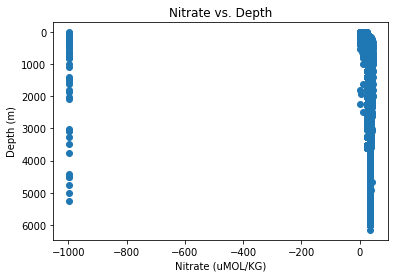

In [46]:
# Let's plot the nitrate data just to visualize what we have.
plt.scatter(data.nitrate,data.depth)
plt.gca().invert_yaxis()
plt.title('Nitrate vs. Depth')
plt.xlabel('Nitrate (uMOL/KG)')
plt.ylabel('Depth (m)')

The raw jma data appear to have some nitrate values at -999, representing either no data or bad data. These have to be removed before we can continue.

Text(0,0.5,'Depth (m)')

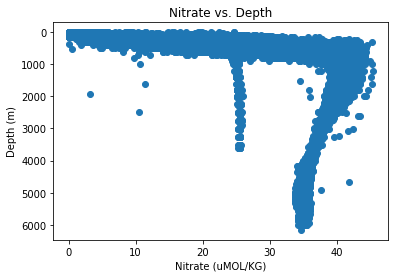

In [47]:
# Looks like there are -999 values to indicate no samples or bad samples. Let's take those out.
corr_data = data[data.nitrate>0]
plt.scatter(corr_data.nitrate,corr_data.depth)
plt.gca().invert_yaxis()
plt.title('Nitrate vs. Depth')
plt.xlabel('Nitrate (uMOL/KG)')
plt.ylabel('Depth (m)')

In [48]:
# Reading in the Argo float data with no NO3 values
infile = 'kuro_BGCargo_noNO3.csv'
data_BGC = pd.read_csv(infile, sep = (','))



# Separating the date column of BGC argo data into year month and day columns to look at seasonality compared to the jma data.
import datetime

data_BGC['year'] = pd.DatetimeIndex(data_BGC['Date/GMT']).year
data_BGC['month'] = pd.DatetimeIndex(data_BGC['Date/GMT']).month
data_BGC['day'] = pd.DatetimeIndex(data_BGC['Date/GMT']).day
data_BGC.head()



,Date/GMT,Days since 1/1/1900,DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT,year,month,day
0,03/02/2013 13:38,41335.568,-989.324,-999.09,3,34.3676,3.2285,27.366,35.1,10.9,148.688,36.983,2013,3,2
1,03/02/2013 13:38,41335.568,-941.762,-950.95,3,34.3560,3.3824,27.342,39.2,12.2,148.688,36.983,2013,3,2
2,03/02/2013 13:38,41335.568,-892.728,-901.33,3,34.3380,3.4966,27.316,40.2,12.6,148.688,36.983,2013,3,2
3,03/02/2013 13:38,41335.568,-842.920,-850.94,3,34.2972,3.4847,27.284,35.5,11.1,148.688,36.983,2013,3,2
4,03/02/2013 13:38,41335.568,-794.287,-801.75,3,34.2942,3.6554,27.265,38.6,12.1,148.688,36.983,2013,3,2


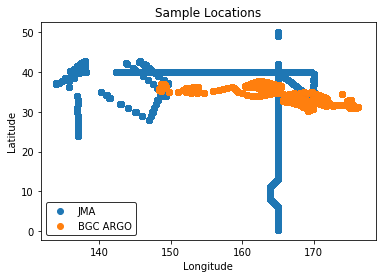

In [49]:
plt.scatter(corr_data.lon,corr_data.lat)
plt.scatter(data_BGC.LON,data_BGC.LAT)
plt.title('Sample Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(('JMA','BGC ARGO'), edgecolor='k', loc='lower left')

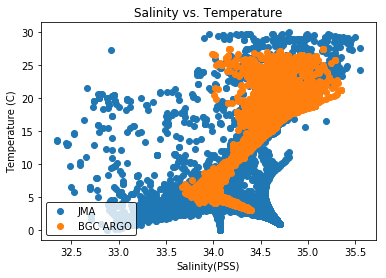

In [50]:
#Plot to look at salinity and depth comparison
plt.scatter(corr_data.sal,corr_data.theta)
plt.scatter(data_BGC['SALINITY[PSS]'],data_BGC['TEMPERATURE[C]'])
plt.title('Salinity vs. Temperature')
plt.xlabel('Salinity(PSS)')
plt.ylabel('Temperature (C)')
plt.legend(('JMA','BGC ARGO'), edgecolor='k', loc='lower left')

Text(0,0.5,'Sample count')

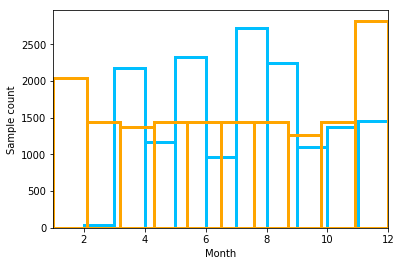

In [51]:
#Plot to look at seasonal comparison of the data

month = [0,12,1]
plt.hist(corr_data.month, facecolor = "none", edgecolor = "deepskyblue", lw = 3)
plt.hist(data_BGC['month'], facecolor = "none", edgecolor = "orange", lw = 3)
plt.xlim([1,12])
plt.xlabel("Month")
plt.ylabel("Sample count")

Start of model testing, and comparison to find the best fit

In [52]:
#import the jma nitrate file, then get columns I want for training
infile = 'jma_nitrate.csv'
nitratefile = pd.read_csv(infile,sep=(','))
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
X = nitratefilefiltered[["sal","theta"]]
y = nitratefilefiltered[["nitrate"]]
print(np.shape(X))
print(np.shape(y))


#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

(15574, 2)
(15574, 1)


In [53]:
# generate the data
import matplotlib.pyplot as plt
import random


# pick model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
    
#run KNN with K neighbors ranging from 1-15, calculating 
#r2 and RMSE to find the best fit model
results = []
for n in range(1,16,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)


Neighbors = 1

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 2.60583634979 

Neighbors = 2

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.43027580855 

Neighbors = 3

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.32055264461 

Neighbors = 4

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.29476945682 

Neighbors = 5

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.26583889298 

Neighbors = 6

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.2178488084 

Neighbors = 7

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.2136395187 

Neighbors = 8

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.19532105271 

Neighbors = 9

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.20220798138 

Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.19394523563 

Neighbors = 11

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.20233819118 

Neighbors = 12

Train

In [54]:
#Make list into array to plot nicely, in order to look at all of the 
#results

myarray = np.asarray(results)

#make a dataframe with each column named for ploting
data = pd.DataFrame({'Kneighbors': myarray[:,0], 'AccScore': myarray[:,1], 'RMSE': myarray[:,2]})
data


,AccScore,Kneighbors,RMSE
0,0.999911,1.0,2.605836
1,0.992724,2.0,2.430276
2,0.989437,3.0,2.320553
3,0.987749,4.0,2.294769
4,0.986243,5.0,2.265839
5,0.985364,6.0,2.217849
6,0.984661,7.0,2.213640
7,0.984078,8.0,2.195321
8,0.983682,9.0,2.202208
9,0.983316,10.0,2.193945


In [55]:
#Run best fit model, and display results
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
print ('Neighbors = %s\n' % (10))
    # compute the R^2 score
accuracyscore = model.score(X_train,y_train)
print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
rmse = sqrt(mean_squared_error(y_test, yfit))
print("RMSE = %s \n" % (rmse))

Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.19394523563 



We can delete or get rid of the next two graphs. Only really showed us that the training/testing worked. The graphs just look cool

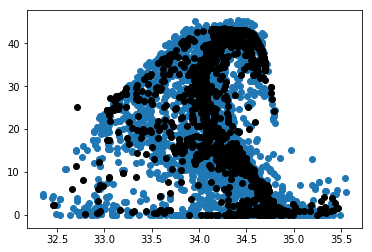

In [56]:
#Plot salinity vs. nitrate predicted
plt.scatter(X_train[["sal"]],y_train)
plt.scatter(xfit[["sal"]], yfit,c = 'k')

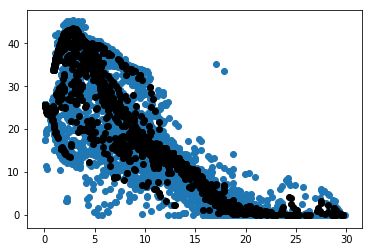

In [57]:
#Plot temperature vs. nitrate predicted
plt.scatter(X_train[["theta"]],y_train)
plt.scatter(xfit[["theta"]], yfit,c = 'k')

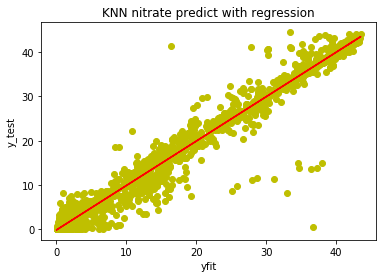

In [58]:
#Plot predicted nitrate from test compared to actual nitrate from test
#this is using the best fit model decided above
from sklearn.linear_model import LinearRegression
plt.scatter(yfit,y_test,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(yfit, y_test)  # perform linear regression
Y_pred = linear_regressor.predict(yfit)  # make predictions
plt.plot(yfit, Y_pred, color='red')
plt.xlabel("yfit")
plt.ylabel("y_test")
plt.title("KNN nitrate predict with regression")
plt.show()

In [59]:
#File using all of data for training
#nitratefile

infilekuro = 'kuro_BGCargo_noNO3.csv'
nitratefilekuro = pd.read_csv(infilekuro,sep=(','))
X = nitratefilekuro[["SALINITY[PSS]","TEMPERATURE[C]"]]

infilekurowithnitrate = 'kuro_BGCargo_NO3.csv'
realNO3file = pd.read_csv(infilekurowithnitrate,sep=(','))
NO3real = realNO3file[["NITRATE[uMOL/KG]"]]



Here we are filtering the argo data, so that we don't try and predict values that are 
below 0. 

In [60]:
Xconcat = pd.concat([X, NO3real], axis=1)
#print Xconcat.shape
NO3filter =  Xconcat['NITRATE[uMOL/KG]']>0
#print(NO3filter.head())
AllNo3filtered = Xconcat[NO3filter]
X = AllNo3filtered[["SALINITY[PSS]","TEMPERATURE[C]"]]
NO3real = AllNo3filtered[["NITRATE[uMOL/KG]"]]
#print AllNo3filtered.shape
#AllNo3filtered

In [61]:
#Predict the argo nitrate data using filtered Salinity/Temperature data from the argo
NO3predicted = model.predict(X)
NO3predicted

array([[42.054],
       [41.457],
       [41.446],
       ...,
       [40.26 ],
       [39.383],
       [38.218]])

Plot the predicted argo nitrate data with the actual filtered argo nitrate data.

0.9540768207601698


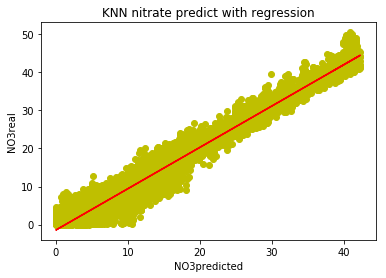

RMSE = 2.5627586437 



In [62]:
#NO3realfilter = NO3real[NO3real.NITRATE[uMOL/KG]>0]
ax = plt.scatter(NO3predicted,NO3real,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(NO3predicted, NO3real)  # perform linear regression
Y_pred = linear_regressor.predict(NO3predicted)  # make predictions
plt.plot(NO3predicted, Y_pred, color='red')
plt.xlabel("NO3predicted")
plt.ylabel("NO3real")
r2 = r2_score(NO3predicted, NO3real)
print r2
#text(50, 5, r2, fontsize=12)
plt.title("KNN nitrate predict with regression")
plt.show()
rmse = sqrt(mean_squared_error(NO3predicted, NO3real))
print("RMSE = %s \n" % (rmse))